In [1]:
import itertools
from sunpy.net import Fido, attrs as a
from sunpy.timeseries import TimeSeries
from sunpy.time import parse_time
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
# Newly found C-class flare

flare_spe = ['2013-11-09 06:22', '2013-11-09 06:38', '2013-11-09 06:47']
flare_start = flare_spe[0]
flare_peak = flare_spe[1] 
flare_end = flare_spe[2]

pre_flare = '2013-11-09 06:15'
post_flare = '2013-11-09 07:10'

# SOL2014-01-28 M2.0

# flare_spe = ['2014-01-28 15:24', '2014-01-28 15:26', '2014-01-28 15:30']

# flare_start = flare_spe[0]
# flare_peak =flare_spe[1] 
# flare_end = flare_spe[2]

# pre_flare = '2014-01-28 15:23'
# post_flare = '2014-01-28 15:30'

# SOL2010-06-12 M

# flare_spe = ['2010-06-12 00:30', '2010-06-12 00:57', '2010-06-12 01:02']

# flare_start = flare_spe[0]
# flare_peak =flare_spe[1] 
# flare_end = flare_spe[2]

# pre_flare = '2010-06-12 00:55'
# post_flare = '2010-06-12 01:02'

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

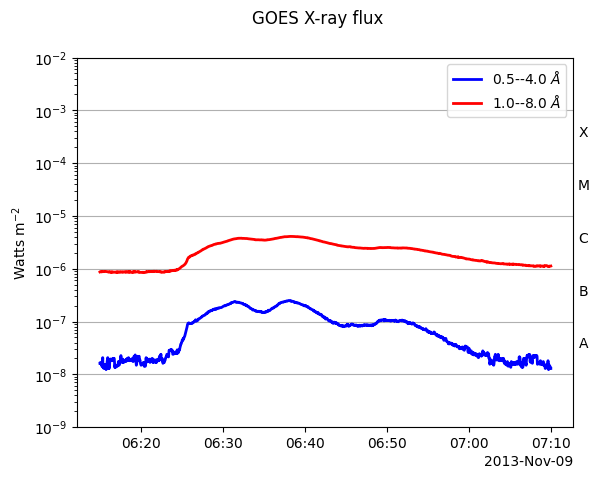

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

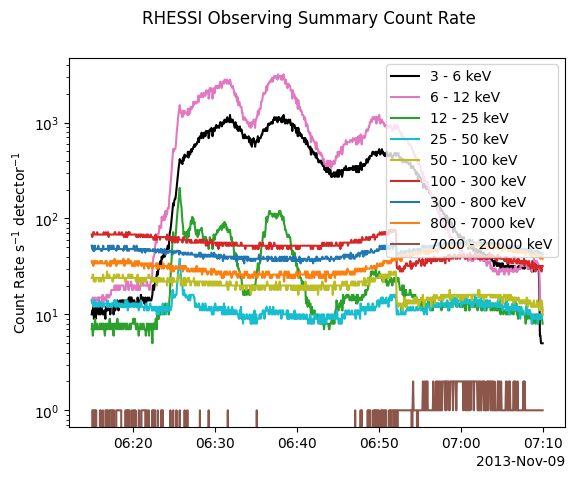

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

c:\Users\james\Documents\Coding\sff_experimentation\venv\Lib\site-packages\sunpy\timeseries\sources\fermi_gbm.py:228: RuntimeWarning: invalid value encountered in divide
  summary_counts.append(summed_counts/energy_width/count_data["exposure"])


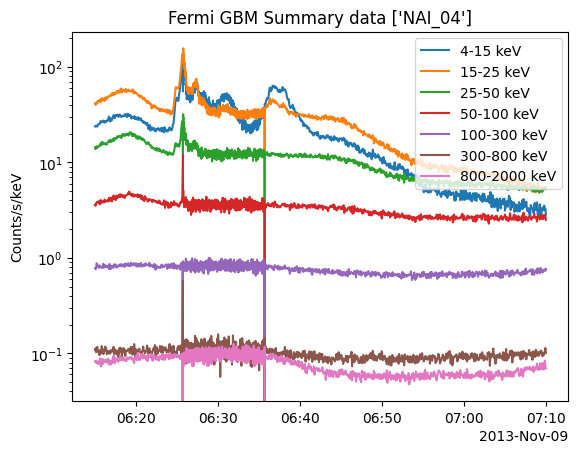

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

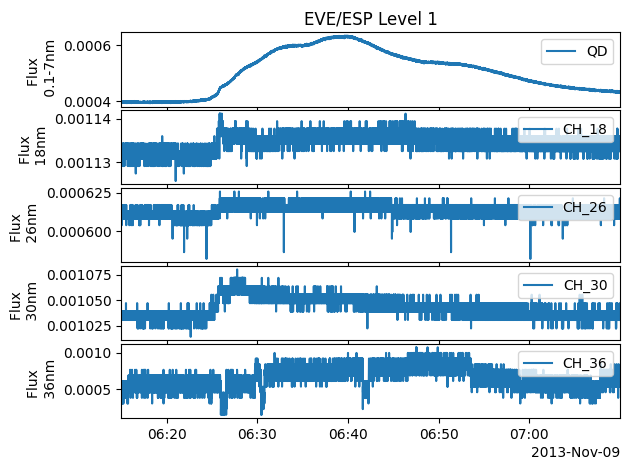

"\n# Hinode/EIS\neis_fido_result = Fido.search(\n    a.Time(flare_start, flare_end),\n    a.Instrument.eis\n)\n\neis_files = Fido.fetch(\n    eis_fido_result[0,0],\n    path='light_curve_data'\n)\n\neis = TimeSeries(eis_files).truncate(pre_flare, post_flare)\neis.peek()\n\neis_df = eis.to_dataframe()\n\n# Hinode/SOT\nsot_fido_result = Fido.search(\n    a.Time(flare_start, flare_end),\n    a.Instrument.sot\n)\n\nsot_files = Fido.fetch(\n    sot_fido_result[0,0],\n    path='light_curve_data'\n)\n\nsot = TimeSeries(sot_files).truncate(pre_flare, post_flare)\nsot.peek()\n\nsot_df = sot.to_dataframe()\n\n# Hinode/XRT\nxrt_fido_result = Fido.search(\n    a.Time(flare_start, flare_end),\n    a.Instrument.xrt\n)\n\nxrt_files = Fido.fetch(\n    xrt_fido_result[0,0],\n    path='light_curve_data'\n)\n\nxrt = TimeSeries(xrt_files).truncate(pre_flare, post_flare)\nxrt.peek()\n\nxrt_df = xrt.to_dataframe()\n"

In [3]:
# GOES
goes_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.goes
)

goes_files = Fido.fetch(
    # [0,2] - New C-class SOL2013-11-09
    # [0,1] - M3.5 SOL2014-01-28
    # [0,0] - M2.0 SOL2010-06-12
    goes_fido_result[0,0],
    path='light_curve_data'
) 

goes = TimeSeries(goes_files).truncate(pre_flare, post_flare)
goes.peek()

goes_df = goes.to_dataframe()

goes_df = goes.to_dataframe()
goes_df = goes_df[(goes_df["xrsa_quality"] == 0) & (goes_df["xrsb_quality"] == 0)]


# RHESSI
rhessi_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.rhessi
)

rhessi_files = Fido.fetch(
    rhessi_fido_result[0,0],
    path='light_curve_data'
)

rhessi = TimeSeries(rhessi_files).truncate(pre_flare, post_flare)
rhessi.peek()

rhessi_df = rhessi.to_dataframe()


# Fermi GBM
fermi_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.gbm,
    a.Detector.n4
)

fermi_files = Fido.fetch(
    fermi_fido_result[0,0],
    path='light_curve_data'
)

fermi = TimeSeries(fermi_files).truncate(pre_flare, post_flare)
fermi.peek()

fermi_df = fermi.to_dataframe()


# SDO/EVE (MEGS-A & MEGS-B)
eve_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.eve
)

eve_files = Fido.fetch(
    eve_fido_result[1,0],
    path='light_curve_data'
)

eve = TimeSeries(eve_files).truncate(pre_flare, post_flare)
eve.peek()

eve_df = eve.to_dataframe()

'''
# Hinode/EIS
eis_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.eis
)

eis_files = Fido.fetch(
    eis_fido_result[0,0],
    path='light_curve_data'
)

eis = TimeSeries(eis_files).truncate(pre_flare, post_flare)
eis.peek()

eis_df = eis.to_dataframe()

# Hinode/SOT
sot_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.sot
)

sot_files = Fido.fetch(
    sot_fido_result[0,0],
    path='light_curve_data'
)

sot = TimeSeries(sot_files).truncate(pre_flare, post_flare)
sot.peek()

sot_df = sot.to_dataframe()

# Hinode/XRT
xrt_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.xrt
)

xrt_files = Fido.fetch(
    xrt_fido_result[0,0],
    path='light_curve_data'
)

xrt = TimeSeries(xrt_files).truncate(pre_flare, post_flare)
xrt.peek()

xrt_df = xrt.to_dataframe()
'''


In [4]:
# try statement to allow for re-running of this cell
try:
    goes_df = goes_df.reset_index(names='datetime')
    goes_df['xrsa_normalised'] = goes_df['xrsa']/goes_df['xrsa'].max()
    goes_df['xrsb_normalised'] = goes_df['xrsb']/goes_df['xrsb'].max()
except:
    pass

try:
    rhessi_df = rhessi_df.reset_index(names='datetime')
    rhessi_df['hxr_normalised'] = rhessi_df['25 - 50 keV']/rhessi_df['25 - 50 keV'].max()
except:
    pass

try:
    fermi_df = fermi_df.reset_index(names='datetime')
    fermi_df['hxr_normalised'] = fermi_df['25-50 keV']/fermi_df['25-50 keV'].max()
except:
    pass

try:
    eve_df = eve_df.reset_index(names='datetime')
    eve_df['QD_normalised'] = (
        (eve_df['QD'] - eve_df['QD'].min()) /
        (eve_df['QD'].max() - eve_df['QD'].min())
    )
    eve_df['CH_18_normalised'] = (
        (eve_df['CH_18'] - eve_df['CH_18'].min()) /
        (eve_df['CH_18'].max() - eve_df['CH_18'].min())
    ).rolling(window=20).mean()
    eve_df['CH_26_normalised'] = (
        (eve_df['CH_26'] - eve_df['CH_26'].min()) /
        (eve_df['CH_26'].max() - eve_df['CH_26'].min())
    ).rolling(window=20).mean()
    eve_df['CH_30_normalised'] = (
        (eve_df['CH_30'] - eve_df['CH_30'].min()) /
        (eve_df['CH_30'].max() - eve_df['CH_30'].min())
    ).rolling(window=20).mean()
    
except:
    pass

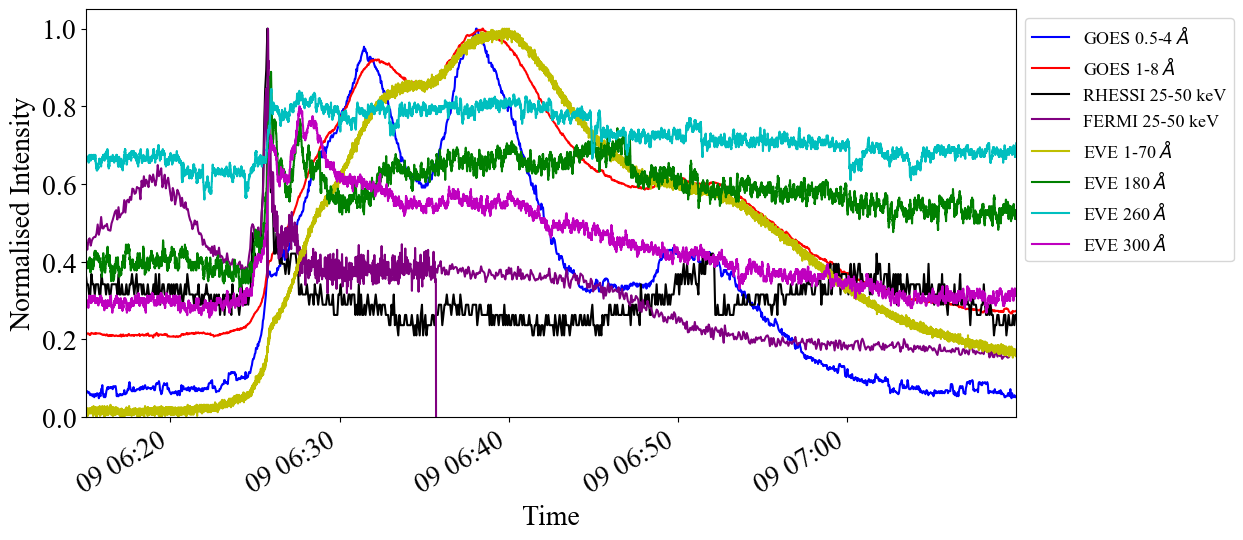

In [5]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 13})

fig, ax = plt.subplots(
    figsize=(12, 6)
)

########
# GOES #
########

goes_df.plot(
    ax=ax,
    x='datetime',
    y=['xrsa_normalised', 'xrsb_normalised'],
    color=['blue', 'red'],
    label=['GOES 0.5-4 $\AA$', 'GOES 1-8 $\AA$']
)

##########
# RHESSI #
##########

rhessi_df.plot(
    ax=ax,
    x='datetime',
    y='hxr_normalised',
    color='k',
    label='RHESSI 25-50 keV'
)

#########
# FERMI #
#########

fermi_df.plot(
    ax=ax,
    x='datetime',
    y='hxr_normalised',
    color='purple',
    label='FERMI 25-50 keV'
)

#######
# EVE #
#######

eve_df.plot(
    ax=ax,
    x='datetime',
    y=[
        'QD_normalised',
        'CH_18_normalised',
        'CH_26_normalised',
        'CH_30_normalised'
    ],
    color=[
        'y',
        'g',
        'c',
        'm'
    ],
    label=[
        'EVE 1-70 $\AA$',
        'EVE 180 $\AA$',
        'EVE 260 $\AA$',
        'EVE 300 $\AA$'
    ]
)

##############
# FORMATTING #
##############

ax.set_xlim(
    xmin=goes_df['datetime'].min(),
    xmax=goes_df['datetime'].max()
)
ax.set_ylim(ymin=0)

ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Normalised Intensity', fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.legend(ncol=1)
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.show()